In [85]:
import tensorflow.python.keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras import utils

Using TensorFlow backend.


In [66]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


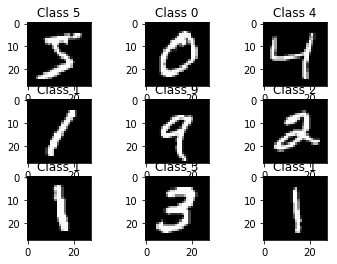

In [52]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [38]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28).astype('float32') / 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [67]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [0]:
# X_train, X_test

In [0]:
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [71]:
Y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
![alt text](https://github.com/wxs/keras-mnist-tutorial/raw/8824b7b56963a92ef879f09acd99cf3a210db2b8/figure.png)

In [75]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0. 
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

When compiling a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical crossentropy, and is a loss function well-suited to comparing two probability distributions.


Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. More detail at Wikipedia

In [77]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=7, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/7
42000/42000 [==============================] - 2s 58us/step - loss: 0.3607 - acc: 0.8910 - val_loss: 0.1432 - val_acc: 0.9576
Epoch 2/7
42000/42000 [==============================] - 2s 45us/step - loss: 0.1552 - acc: 0.9527 - val_loss: 0.1046 - val_acc: 0.9674
Epoch 3/7
42000/42000 [==============================] - 2s 45us/step - loss: 0.1174 - acc: 0.9636 - val_loss: 0.1047 - val_acc: 0.9670
Epoch 4/7
42000/42000 [==============================] - 2s 53us/step - loss: 0.0959 - acc: 0.9704 - val_loss: 0.1074 - val_acc: 0.9692
Epoch 5/7
42000/42000 [==============================] - 2s 46us/step - loss: 0.0789 - acc: 0.9743 - val_loss: 0.0860 - val_acc: 0.9742
Epoch 6/7
41984/42000 [============================>.] - ETA: 0s - loss: 0.0685 - acc: 0.9784

42000/42000 [==============================] - 2s 45us/step - loss: 0.0685 - acc: 0.9785 - val_loss: 0.0839 - val_acc: 0.9747
Epoch 7/7
42000/42000 [==============================] - 2s 46us/step - loss: 0.0617 - acc: 0.9800 - val_loss: 0.0859 - val_acc: 0.9756


In [78]:
score  =  model.evaluate(X_test, Y_test, verbose=3)
print('Test score loss:', score[0])
print('Test accuracy:', score[1])

Test score loss: 0.06687779654782498
Test accuracy: 0.9795


Model Prediction:  [6]
Ground-truth:  6


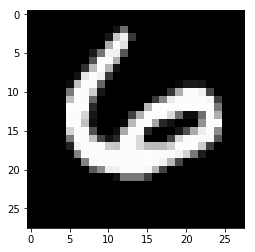

In [84]:
import random
i = random.randint(1, 1000)
random_image = X_test[i]
plt.imshow(X_test[i], cmap='gray')
print('Model Prediction: ', model.predict_classes(random_image.reshape(1,28,28)))
print('Ground-truth: ', y_test[i])